In [3]:
import pandas as pd
import numpy as np
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns\n")
df.info()

Dataset Shape: 418 rows × 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
missing = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df) * 100).round(2)

missing_report = pd.DataFrame({
    "Missing Count": missing,
    "Missing %": missing_percentage
}).sort_values("Missing Count", ascending=False)


print(missing_report[missing_report["Missing Count"] > 0])
print(f"\nTotal cells with missing data: {df.isnull().sum().sum()}")

       Missing Count  Missing %
Cabin            327      78.23
Age               86      20.57
Fare               1       0.24

Total cells with missing data: 414


In [13]:
survived = df[df["Survived"] == 1]
survived_by_class = survived["Pclass"].value_counts().sort_index()
survival_rate_class = df.groupby("Pclass")["Survived"].mean().round(3) * 100


print(f"Survived count by class:\n{survived_by_class.to_string()}")
print(f"\nSurvival rate by class:\n{survival_rate_class.to_string()} %")
print(f"\n→ Pclass {survival_rate_class.idxmax()} had the highest survival rate "
      f"at {survival_rate_class.max()}%")

survived_by_sex = survived["Sex"].value_counts()
survival_rate_sex = df.groupby("Sex")["Survived"].mean().round(3) * 100


print(f"Survived count by sex:\n{survived_by_sex.to_string()}")
print(f"\nSurvival rate by sex:\n{survival_rate_sex.to_string()} %")
print(f"\n→ {survived_by_sex.idxmax().capitalize()}s survived more "
      f"({survived_by_sex.max()} survivors, {survival_rate_sex.max()}% rate)")

Survived count by class:
Pclass
1    50
2    30
3    72

Survival rate by class:
Pclass
1    46.7
2    32.3
3    33.0 %

→ Pclass 1 had the highest survival rate at 46.7%
Survived count by sex:
Sex
female    152

Survival rate by sex:
Sex
female    100.0
male        0.0 %

→ Females survived more (152 survivors, 100.0% rate)


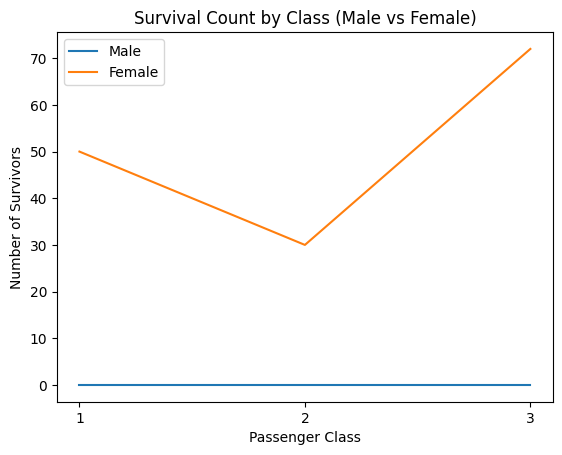

In [16]:
import matplotlib.pyplot as plt

male_survival = df[df["Sex"] == "male"].groupby("Pclass")["Survived"].sum()
female_survival = df[df["Sex"] == "female"].groupby("Pclass")["Survived"].sum()

plt.plot(male_survival.index, male_survival.values, label="Male")
plt.plot(female_survival.index, female_survival.values, label="Female")
plt.title("Survival Count by Class (Male vs Female)")
plt.xlabel("Passenger Class")
plt.ylabel("Number of Survivors")
plt.xticks([1, 2, 3])
plt.legend()

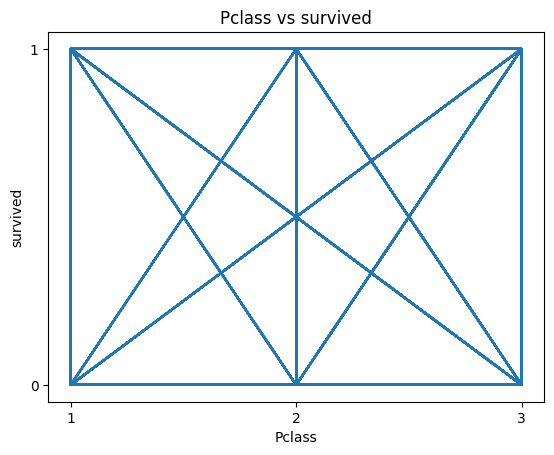

In [21]:
plt.plot(df['Pclass'], df['Survived'])
plt.title("Pclass vs survived")
plt.xlabel("Pclass")
plt.ylabel("survived")
plt.xticks([1,2,3])
plt.yticks([0,1])
plt.show()

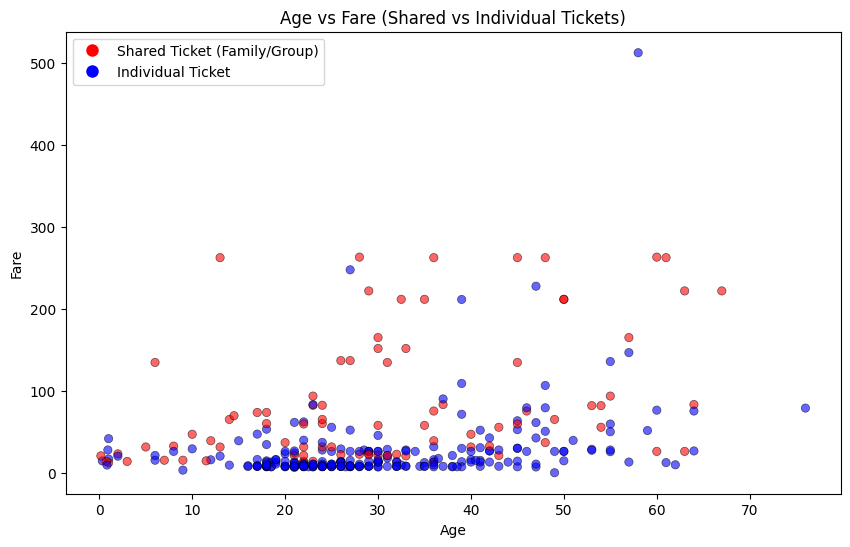

In [32]:
df['TicketCount'] = df.groupby('Ticket')['Ticket'].transform('count')
df['SharedTicket'] = df['TicketCount'] > 1

colors = df['SharedTicket'].map({True: 'red', False: 'blue'})

plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Fare'], c=colors, alpha=0.6, edgecolors='k', linewidths=0.5)
plt.title("Age vs Fare (Shared vs Individual Tickets)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Shared Ticket (Family/Group)'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Individual Ticket')
])
plt.show()

In [ ]:
young_individual = df[(df['Age'] <= 5) & (df['SharedTicket'] == False)]
print(f"Young children (age ≤ 5) with individual tickets: {len(young_individual)}\n")
print(young_individual[['Name', 'Age', 'Ticket', 'Fare', 'SibSp', 'Parch', 'Pclass']].to_string())

Young children (age ≤ 5) with individual tickets: 6

                                        Name   Age         Ticket     Fare  SibSp  Parch  Pclass
117          Sandstrom, Miss. Beatrice Irene  1.00        PP 9549  16.7000      1      1       3
201  Danbom, Master. Gilbert Sigvard Emanuel  0.33         347080  14.4000      0      2       3
250                    West, Miss. Barbara J  0.92     C.A. 34651  27.7500      1      2       2
284              Rosblom, Miss. Salli Helena  2.00         370129  20.2125      1      1       3
296                    Laroche, Miss. Louise  1.00  SC/Paris 2123  41.5792      1      2       2
307                Aks, Master. Philip Frank  0.83         392091   9.3500      0      1       3


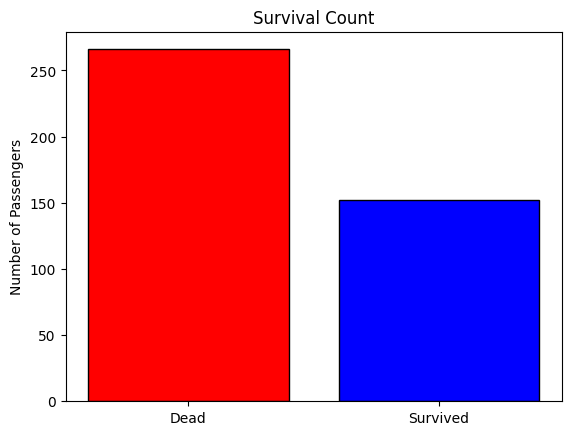

In [ ]:
survival_counts = df['Survived'].value_counts().sort_index()

plt.bar(['Dead', 'Survived'], survival_counts.values, color=['red', 'blue'], edgecolor='black')
plt.title("Survival Count")
plt.ylabel("Number of Passengers")
plt.show()

In [41]:
survival_counts = df['Survived'].value_counts()
print(f"{survival_counts.to_string()}")


Survived
0    266
1    152


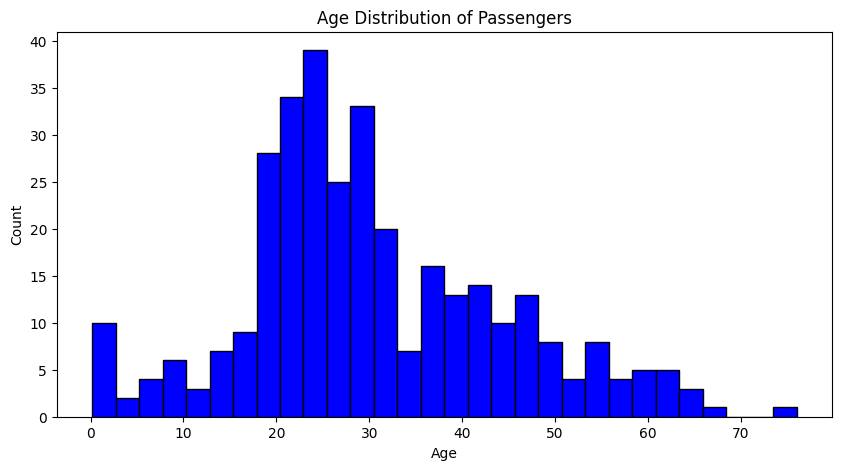

In [52]:
plt.figure(figsize=(10, 5))
plt.hist(df['Age'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

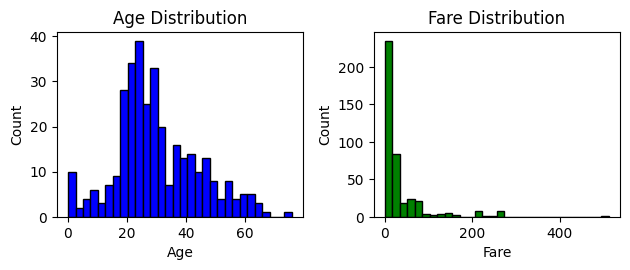

In [53]:
plt.subplot(2,2,1)
plt.hist(df['Age'].dropna(), bins=30, color='blue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.subplot(2,2,2)
plt.hist(df['Fare'].dropna(), bins=30, color='green', edgecolor='black')
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
